# Sound Classification for behaviour analysis.

In this notebook, ten different types of sounds are used to create a classifier capable to classify these sounds. The purpose of creating this model is to help identify anti-social and criminal behaviour from sound clips. In this notebook, we will first do some important EDA on these sounds to know what we are dealing with. After this we will be extracting features from these sound waves and perform some preprecessing techniques to createa dataset that we can use to train our model. We will try to use various models and hyper parameters to obtain the best results.


### Train-Test-Validation Split

Afyer the feature extraction and Dimentionalaity reduction using PCA we need to divide the data into three subsets. 
1. Train set
2. Test set
3. Validation set

**Train set:** The train set will have 81% of data.
**Test set:** The test set will have 10% of data.
**Validation set:** The validation set will have 9% of data.

We divide the original dataset into three subsets as we do not want to test or validate the model performance on the same data it is trained on.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X, X_test, y, y_test = train_test_split(concat_array, label_array, test_size=0.1, random_state=12, stratify=label_array)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [11]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(7072, 49) (7072, 10)
(786, 49) (786, 10)
(874, 49) (874, 10)


In [12]:
counts = np.sum(y_train, axis=0)

# Print the counts of each number
for i in range(len(counts)):
    print(f"Number {i} appears {counts[i]} times in the array.")

Number 0 appears 810.0 times in the array.
Number 1 appears 347.0 times in the array.
Number 2 appears 810.0 times in the array.
Number 3 appears 810.0 times in the array.
Number 4 appears 810.0 times in the array.
Number 5 appears 810.0 times in the array.
Number 6 appears 303.0 times in the array.
Number 7 appears 810.0 times in the array.
Number 8 appears 752.0 times in the array.
Number 9 appears 810.0 times in the array.


Although there are two classes that have a little lesser number of instances than the other classes, but they are enough to give decent results. In case the model performs poorly, we can use SMOTE to balance the dataset by adding more instances. 

## Model Training

### ANNs

Artificial Neural Networks (ANNs) are a type of machine learning model inspired by biological neurons in the brain. ANNs consist of multiple layers of interconnected artificial neurons that process and transmit information. The input data is fed into the input layer, which passes the information to the hidden layers through weighted connections between neurons. The weights between neurons in the network are learned during the training process by adjusting them to minimize a loss function using backpropagation.

#### Training with all the features

In [13]:
input_shape = X_train.shape[1:]

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

### A basic ANN

The first model that we are going to train on all the features we extracted would be an ANN with increasing number of neurons in subsequent layers. the neurons in the first layer are kept double than the number of inputs. lesser number of neurons in the initial layers will help the model to learn on low level features of the dataset. The complexity is increased gradually so that the model can learn high level features as well. The output layer has 10 neurons, as we have 10 classes.

In [15]:
modelANN = Sequential()

# We are adding 20% dropout in each dense layer
modelANN.add(Dense(100,input_shape=input_shape))
modelANN.add(Activation("relu"))
modelANN.add(Dropout(0.2))

modelANN.add(Dense(300))
modelANN.add(Activation("relu"))
modelANN.add(Dropout(0.2))

modelANN.add(Dense(300))
modelANN.add(Activation("relu"))
modelANN.add(Dropout(0.2))

modelANN.add(Dense(100))
modelANN.add(Activation("relu"))
modelANN.add(Dropout(0.2))

# The output layer will have 10 neurons as out classifier gives 10bit result         
modelANN.add(Dense(10))
modelANN.add(Activation("softmax"))

# Show summary of the model
modelANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               5000      
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               30300     
_________________________________________________________________
activation_3 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)              

To compile the model we will be using a categorical cross entropy loss as it is used when the output is in the categorical form. The optimizer that we use will be adam and the performance metrics will be set to accuracy.

In [16]:
modelANN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

For this model we will be using the following hyper parameters
1. epochs:  This parameter will specify for how many iterations the training process will run.During each epoch, the model processes the entire training dataset, updates the model's weights, and evaluates the model's performance on the training data.
2. batch size: This parameter specifies the number of samples that the neural network processes before updating the model's weights during training.
3. monitor: This parameter specifies which metric to monitor during training. In this case, the validation loss is being monitored, so the value of monitor is set to 'val_loss'.
4. mode: This parameter specifies whether to minimize or maximize the monitored metric. In this case, we want to minimize the validation loss, so the value of mode is set to 'min'.
5. verbose: This parameter controls the verbosity of the output during training. A value of 1 means that progress messages will be displayed on the console.
6. patience: This parameter specifies how many epochs to wait before stopping the training process if the monitored metric does not improve. In this case, the training will stop if the validation loss does not improve after 25 epochs.

In [17]:
epochs = 100
batch_size = 32
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [18]:
historyANN = modelANN.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stop]
)

Epoch 1/100


2023-04-07 20:31:31.372605: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


221/221 [==============================] - 0s 2ms/step - loss: 3.3175 - accuracy: 0.1516 - val_loss: 2.2132 - val_accuracy: 0.1947
Epoch 2/100
221/221 [==============================] - 0s 2ms/step - loss: 2.1189 - accuracy: 0.2407 - val_loss: 1.8499 - val_accuracy: 0.4109
Epoch 3/100
221/221 [==============================] - 0s 1ms/step - loss: 1.9049 - accuracy: 0.3258 - val_loss: 1.6265 - val_accuracy: 0.4644
Epoch 4/100
221/221 [==============================] - 0s 2ms/step - loss: 1.7574 - accuracy: 0.3791 - val_loss: 1.4591 - val_accuracy: 0.4936
Epoch 5/100
221/221 [==============================] - 0s 1ms/step - loss: 1.6161 - accuracy: 0.4314 - val_loss: 1.3781 - val_accuracy: 0.5204
Epoch 6/100
221/221 [==============================] - 0s 2ms/step - loss: 1.5193 - accuracy: 0.4688 - val_loss: 1.2525 - val_accuracy: 0.5891
Epoch 7/100
221/221 [==============================] - 0s 2ms/step - loss: 1.4243 - accuracy: 0.5049 - val_loss: 1.1762 - val_accuracy: 0.6107
Epoch 8/100

221/221 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.8443 - val_loss: 0.4192 - val_accuracy: 0.8626
Epoch 59/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4810 - accuracy: 0.8394 - val_loss: 0.3802 - val_accuracy: 0.8753
Epoch 60/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8512 - val_loss: 0.3999 - val_accuracy: 0.8753
Epoch 61/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8450 - val_loss: 0.3719 - val_accuracy: 0.8868
Epoch 62/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4616 - accuracy: 0.8398 - val_loss: 0.3757 - val_accuracy: 0.8791
Epoch 63/100
221/221 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.8481 - val_loss: 0.4033 - val_accuracy: 0.8753
Epoch 64/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8528 - val_loss: 0.3793 - val_accuracy: 0.8715
Epoch

In [19]:
score = modelANN.evaluate(X_test, y_test)
print('\nThe model test accuracy is',score[1]*100 ,'\n\nThe model test loss is',score[0]*100)

28/28 [==============================] - 0s 731us/step - loss: 0.3822 - accuracy: 0.8890

The model test accuracy is 88.90160322189331 

The model test loss is 38.22210133075714


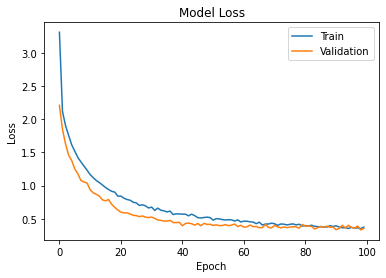

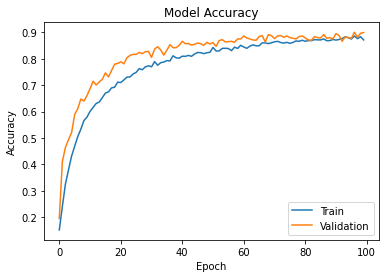

In [20]:
import matplotlib.pyplot as plt

# Plot the convergence graph for loss
plt.plot(historyANN.history['loss'])
plt.plot(historyANN.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the convergence graph for accuracy
plt.plot(historyANN.history['accuracy'])
plt.plot(historyANN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
pred = modelANN.predict(X_test)
# one hot encoded multiclass labels so converting to argmax
arg_pred = np.argmax(pred, axis=1)
arg_true = np.argmax(y_test, axis=1)
print(confusion_matrix(arg_true, arg_pred))

[[97  0  2  0  0  0  0  0  0  1]
 [ 1 32  0  0  1  2  1  1  2  3]
 [ 4  1 86  2  2  1  0  0  1  3]
 [ 1  0  4 79  0  1  5  0  5  5]
 [ 0  0  3  0 91  0  1  3  2  0]
 [ 0  0  3  0  0 97  0  0  0  0]
 [ 1  0  2  0  1  0 34  0  0  0]
 [ 1  1  0  0  2  1  0 93  0  2]
 [ 0  0  2  0  0  0  0  0 90  1]
 [ 3  1 16  0  0  0  1  1  0 78]]


In [24]:
print(classification_report(arg_true, arg_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       100
           1       0.91      0.74      0.82        43
           2       0.73      0.86      0.79       100
           3       0.98      0.79      0.87       100
           4       0.94      0.91      0.92       100
           5       0.95      0.97      0.96       100
           6       0.81      0.89      0.85        38
           7       0.95      0.93      0.94       100
           8       0.90      0.97      0.93        93
           9       0.84      0.78      0.81       100

    accuracy                           0.89       874
   macro avg       0.89      0.88      0.88       874
weighted avg       0.89      0.89      0.89       874



In [21]:
modelANN.save('ann_1.h5')

#### Model 2 - Newral Network Pruning:

In the second model, we are going to try a very effective technique called 'Neural Network Pruning' where we start at a higer number of neurons in the first layer and gradually decrease the neurons in the comming layers. In this model we will start at 500 neurons in the input layer and start to decrease the neurons by 100 in every next layer. We have added a 30% dropout before the output layer sa well.

In [41]:
model2 = Sequential()
model2.add(Dense(500, activation='relu', input_shape=input_shape))
model2.add(Dense(400, activation='relu'))
model2.add(Dense(300, activation='relu'))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(100, activation='relu'))
# drop 30% neurons
model2.add(Dropout(0.3))
# output layer
model2.add(Dense(10, activation='softmax'))
# check model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25000     
_________________________________________________________________
dense_1 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [42]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
epochs = 100
batch_size = 32
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [44]:
history2 = model2.fit(
    X_train, 
    y_train, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stop]
)

Epoch 1/100
221/221 [==============================] - 1s 2ms/step - loss: 1.9760 - accuracy: 0.3512 - val_loss: 1.4351 - val_accuracy: 0.5064
Epoch 2/100
221/221 [==============================] - 0s 2ms/step - loss: 1.4706 - accuracy: 0.4901 - val_loss: 1.2118 - val_accuracy: 0.5878
Epoch 3/100
221/221 [==============================] - 0s 2ms/step - loss: 1.2568 - accuracy: 0.5771 - val_loss: 1.0334 - val_accuracy: 0.6374
Epoch 4/100
221/221 [==============================] - 0s 2ms/step - loss: 1.1094 - accuracy: 0.6208 - val_loss: 0.9450 - val_accuracy: 0.6743
Epoch 5/100
221/221 [==============================] - 0s 1ms/step - loss: 0.9859 - accuracy: 0.6745 - val_loss: 0.8972 - val_accuracy: 0.6934
Epoch 6/100
221/221 [==============================] - 0s 2ms/step - loss: 0.8831 - accuracy: 0.7083 - val_loss: 0.8102 - val_accuracy: 0.7176
Epoch 7/100
221/221 [==============================] - 0s 2ms/step - loss: 0.7930 - accuracy: 0.7320 - val_loss: 0.6550 - val_accuracy: 0.7735

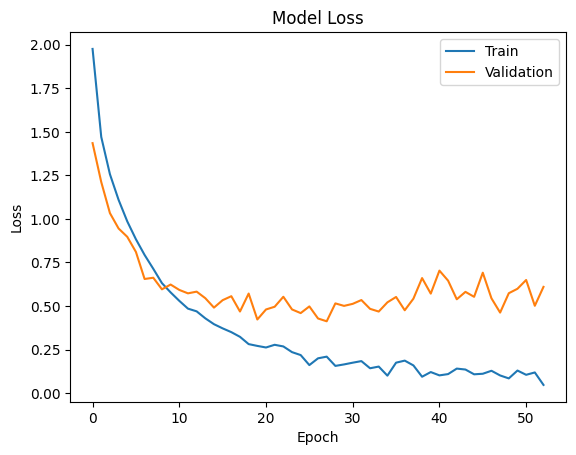

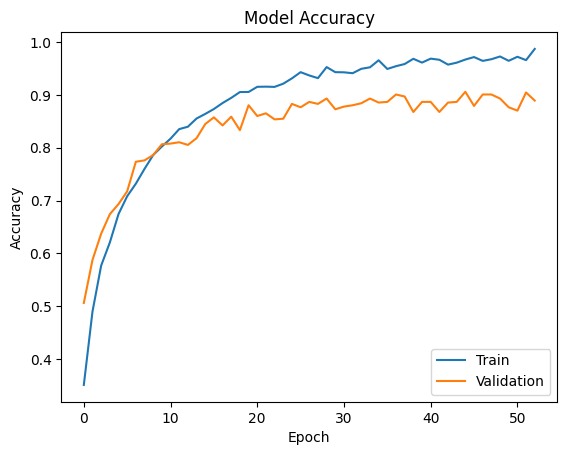

In [45]:
import matplotlib.pyplot as plt
# Plot the convergence graph for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the convergence graph for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model2.predict(X_test)
# one hot encoded multiclass labels so converting to argmax
arg_pred = np.argmax(pred, axis=1)
arg_true = np.argmax(y_test, axis=1)
print(confusion_matrix(arg_true, arg_pred))

[[97  0  0  1  0  0  0  0  0  2]
 [ 1 32  1  1  0  0  1  0  1  6]
 [ 3  0 79 10  3  0  0  1  0  4]
 [ 2  2  6 84  0  0  2  0  2  2]
 [ 0  3  1  1 90  0  0  3  1  1]
 [ 0  3  1  0  0 94  1  0  0  1]
 [ 0  0  0  3  0  0 35  0  0  0]
 [ 0  1  1  0  3  1  0 94  0  0]
 [ 0  1  1  0  0  0  0  0 90  1]
 [ 2  1  3  1  3  0  0  0  0 90]]


In [47]:
print(classification_report(arg_true, arg_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       100
           1       0.74      0.74      0.74        43
           2       0.85      0.79      0.82       100
           3       0.83      0.84      0.84       100
           4       0.91      0.90      0.90       100
           5       0.99      0.94      0.96       100
           6       0.90      0.92      0.91        38
           7       0.96      0.94      0.95       100
           8       0.96      0.97      0.96        93
           9       0.84      0.90      0.87       100

    accuracy                           0.90       874
   macro avg       0.89      0.89      0.89       874
weighted avg       0.90      0.90      0.90       874



In [48]:
model2.save('ann_nnp.h5')

#### Model- 3: Hyperparameter tunning 

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [31]:
def build_model(hp):
    model = keras.Sequential()
    # Input layer
    model.add(layers.Dense(units=hp.Int('units_input', min_value=100, max_value=500, step=16), input_dim=49, activation='relu'))
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=100, max_value=500, step=16), activation='relu'))
    # Output layer
    model.add(layers.Dense(units=10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [32]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='Tuning',
    project_name='SoundClassification')


In [51]:
history_tuned = tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


INFO:tensorflow:Oracle triggered exit


In [54]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [55]:
tuner.results_summary()

Results summary
Results in Tuning/SoundClassification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
units_input: 452
num_layers: 2
units_0: 436
learning_rate: 0.001
units_1: 404
units_2: 212
units_3: 356
Score: 0.9189991354942322

Trial 07 summary
Hyperparameters:
units_input: 148
num_layers: 4
units_0: 116
learning_rate: 0.001
units_1: 292
units_2: 452
units_3: 292
Score: 0.9156064391136169

Trial 00 summary
Hyperparameters:
units_input: 468
num_layers: 2
units_0: 292
learning_rate: 0.001
units_1: 100
Score: 0.9139100909233093

Trial 03 summary
Hyperparameters:
units_input: 484
num_layers: 4
units_0: 452
learning_rate: 0.001
units_1: 196
units_2: 484
units_3: 228
Score: 0.9122137427330017

Trial 01 summary
Hyperparameters:
units_input: 276
num_layers: 4
units_0: 340
learning_rate: 0.001
units_1: 164
units_2: 100
units_3: 100
Score: 0.9113655686378479

Trial 05 summary
Hyperparameters:
units_input: 420
num_layers: 2
units_0: 2

In [56]:
model = tuner.hypermodel.build(best_hps)

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 452)               22600     
_________________________________________________________________
dense_8 (Dense)              (None, 436)               197508    
_________________________________________________________________
dense_9 (Dense)              (None, 404)               176548    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                4050      
Total params: 400,706
Trainable params: 400,706
Non-trainable params: 0
_________________________________________________________________


In [59]:
from tensorflow.keras import optimizers

model.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(lr=0.001), metrics=['accuracy'])


In [60]:
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
221/221 [==============================] - 0s 1ms/step - loss: 2.4650 - accuracy: 0.4460 - val_loss: 1.4116 - val_accuracy: 0.5331
Epoch 2/100
221/221 [==============================] - 0s 1ms/step - loss: 1.2151 - accuracy: 0.5875 - val_loss: 1.1000 - val_accuracy: 0.6247
Epoch 3/100
221/221 [==============================] - 0s 1ms/step - loss: 1.0571 - accuracy: 0.6349 - val_loss: 0.9255 - val_accuracy: 0.6870
Epoch 4/100
221/221 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.6949 - val_loss: 0.8304 - val_accuracy: 0.7087
Epoch 5/100
221/221 [==============================] - 0s 1ms/step - loss: 0.7792 - accuracy: 0.7380 - val_loss: 0.7019 - val_accuracy: 0.7710
Epoch 6/100
221/221 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.7714 - val_loss: 0.7163 - val_accuracy: 0.7481
Epoch 7/100
221/221 [==============================] - 0s 1ms/step - loss: 0.5981 - accuracy: 0.7940 - val_loss: 0.6323 - val_accuracy: 0.7977

Epoch 58/100
221/221 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.8845 - val_accuracy: 0.8715
Epoch 59/100
221/221 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9726 - val_loss: 0.7195 - val_accuracy: 0.8817
Epoch 60/100
221/221 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.9659 - val_loss: 0.7044 - val_accuracy: 0.8842
Epoch 61/100
221/221 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9717 - val_loss: 0.7270 - val_accuracy: 0.9020
Epoch 62/100
221/221 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9816 - val_loss: 0.8354 - val_accuracy: 0.8779
Epoch 63/100
221/221 [==============================] - 0s 1ms/step - loss: 0.0716 - accuracy: 0.9794 - val_loss: 0.6862 - val_accuracy: 0.8957
Epoch 64/100
221/221 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9809 - val_loss: 0.8478 - val_accuracy:

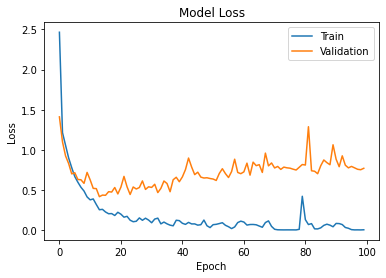

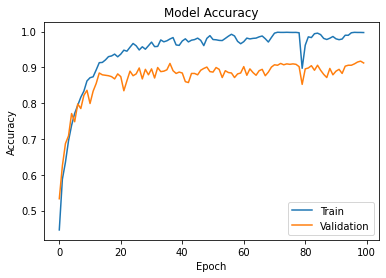

In [61]:
import matplotlib.pyplot as plt

# Plot the convergence graph for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the convergence graph for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [62]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model.predict(X_test)
# one hot encoded multiclass labels so converting to argmax
arg_pred = np.argmax(pred, axis=1)
arg_true = np.argmax(y_test, axis=1)
print(confusion_matrix(arg_true, arg_pred))

[[97  0  2  1  0  0  0  0  0  0]
 [ 1 33  0  0  0  0  2  2  2  3]
 [ 0  1 88  0  1  1  0  1  3  5]
 [ 1  2  8 82  2  0  2  0  3  0]
 [ 0  0  0  0 94  0  0  3  3  0]
 [ 0  0  0  1  0 98  0  0  0  1]
 [ 1  0  0  1  1  0 35  0  0  0]
 [ 0  1  0  0  3  0  0 96  0  0]
 [ 0  0  1  0  0  0  0  0 89  3]
 [ 2  0  2  1  1  0  0  1  1 92]]


In [63]:
print(classification_report(arg_true, arg_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       100
           1       0.89      0.77      0.82        43
           2       0.87      0.88      0.88       100
           3       0.95      0.82      0.88       100
           4       0.92      0.94      0.93       100
           5       0.99      0.98      0.98       100
           6       0.90      0.92      0.91        38
           7       0.93      0.96      0.95       100
           8       0.88      0.96      0.92        93
           9       0.88      0.92      0.90       100

    accuracy                           0.92       874
   macro avg       0.92      0.91      0.91       874
weighted avg       0.92      0.92      0.92       874



In [64]:
model.save('ann_tuned.h5')

#### Model using PCA components

Now lets train our model on the pca components that we created earlier. Although 90% of information is available in the 3 pca we can not expect the model to perform very well as using pca usually reduces the performance of the model. 

In [10]:
X, X_test, y, y_test = train_test_split(pca_array, label_array, test_size=0.1, random_state=42, stratify=label_array)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(7072, 3) (7072, 10)
(786, 3) (786, 10)
(874, 3) (874, 10)


We will go straight into using the random search method to find out how it performs on various ANN models. At the end we can see the results and compare to our intial hypothesis.

In [11]:
def build_model(hp):
    model = keras.Sequential()
    # Input layer
    model.add(layers.Dense(units=hp.Int('units_input', min_value=100, max_value=500, step=16), input_dim=3, activation='relu'))
    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=100, max_value=500, step=16), activation='relu'))
    # Output layer
    model.add(layers.Dense(units=10, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


Same as before, we will be doing 10 trails with 100 epocs to have an idea how the model performs.

In [14]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='pca',
    project_name='SoundClassification')


2023-04-08 01:03:01.064217: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-04-08 01:03:01.089491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-08 01:03:01.089944: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.755GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2023-04-08 01:03:01.090055: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2023-04-08 01:03:01.090851: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2023-04-08 01:03:01.091622: I tensorflow/stream_executor/pl

In [15]:
history_tuned = tuner.search(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


Trial 10 Complete [00h 01m 08s]
val_accuracy: 0.5313825209935507

Best val_accuracy So Far: 0.5606446266174316
Total elapsed time: 00h 14m 39s
INFO:tensorflow:Oracle triggered exit


So we can see that none of the 10 trials gave much promising results.Even if we train the best model for a 100 more epocs the validation loss seems to increase and the validation accuracy does notincrease more than 50-55 percent. This is all observable in the graphs below. This is because the data required to train the model is not enough for it to learn all the features and it starts to over fit to the training instances rather than generalizing. That is why it starts to give good accuracy and loss after some time on training data but not on the validation data. If we test the model on test data we come to see that the metrics are extreamely poor as compared to the model that is trained on the complete dataset.

In [16]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


In [17]:
tuner.results_summary()

Results summary
Results in pca/SoundClassification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
units_input: 244
num_layers: 4
units_0: 212
learning_rate: 0.001
units_1: 436
units_2: 260
units_3: 100
Score: 0.5606446266174316

Trial 02 summary
Hyperparameters:
units_input: 148
num_layers: 3
units_0: 132
learning_rate: 0.001
units_1: 228
units_2: 388
Score: 0.558948278427124

Trial 04 summary
Hyperparameters:
units_input: 308
num_layers: 2
units_0: 292
learning_rate: 0.001
units_1: 148
units_2: 132
Score: 0.5491942365964254

Trial 07 summary
Hyperparameters:
units_input: 116
num_layers: 4
units_0: 292
learning_rate: 0.0001
units_1: 468
units_2: 324
units_3: 356
units_4: 212
Score: 0.5351993242899576

Trial 09 summary
Hyperparameters:
units_input: 484
num_layers: 1
units_0: 260
learning_rate: 0.001
units_1: 244
units_2: 452
units_3: 436
units_4: 388
Score: 0.5313825209935507

Trial 08 summary
Hyperparameters:
units_input: 308
n

In [18]:
model_pca = tuner.hypermodel.build(best_hps)

In [19]:
model_pca.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 244)               976       
_________________________________________________________________
dense_4 (Dense)              (None, 212)               51940     
_________________________________________________________________
dense_5 (Dense)              (None, 436)               92868     
_________________________________________________________________
dense_6 (Dense)              (None, 260)               113620    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               26100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 286,514
Trainable params: 286,514
Non-trainable params: 0
________________________________________________

In [21]:
from tensorflow.keras import optimizers

model_pca.compile(loss='categorical_crossentropy', optimizer = optimizers.Adam(lr=0.001), metrics=['accuracy'])


In [22]:
history_pca=model_pca.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

Epoch 1/200
221/221 [==============================] - 0s 2ms/step - loss: 1.9296 - accuracy: 0.3050 - val_loss: 1.7663 - val_accuracy: 0.3677
Epoch 2/200
221/221 [==============================] - 0s 1ms/step - loss: 1.7334 - accuracy: 0.3539 - val_loss: 1.7488 - val_accuracy: 0.3728
Epoch 3/200
221/221 [==============================] - 0s 1ms/step - loss: 1.6959 - accuracy: 0.3644 - val_loss: 1.7159 - val_accuracy: 0.3957
Epoch 4/200
221/221 [==============================] - 0s 1ms/step - loss: 1.6706 - accuracy: 0.3760 - val_loss: 1.7074 - val_accuracy: 0.3880
Epoch 5/200
221/221 [==============================] - 0s 1ms/step - loss: 1.6388 - accuracy: 0.3999 - val_loss: 1.6600 - val_accuracy: 0.4059
Epoch 6/200
221/221 [==============================] - 0s 1ms/step - loss: 1.6087 - accuracy: 0.4033 - val_loss: 1.6443 - val_accuracy: 0.4071
Epoch 7/200
221/221 [==============================] - 0s 1ms/step - loss: 1.5811 - accuracy: 0.4053 - val_loss: 1.7026 - val_accuracy: 0.3804

Epoch 58/200
221/221 [==============================] - 0s 1ms/step - loss: 0.9544 - accuracy: 0.6382 - val_loss: 1.5259 - val_accuracy: 0.5127
Epoch 59/200
221/221 [==============================] - 0s 1ms/step - loss: 0.9414 - accuracy: 0.6370 - val_loss: 1.4336 - val_accuracy: 0.5293
Epoch 60/200
221/221 [==============================] - 0s 1ms/step - loss: 0.9231 - accuracy: 0.6408 - val_loss: 1.4911 - val_accuracy: 0.5407
Epoch 61/200
221/221 [==============================] - 0s 1ms/step - loss: 0.9323 - accuracy: 0.6456 - val_loss: 1.4910 - val_accuracy: 0.5204
Epoch 62/200
221/221 [==============================] - 0s 1ms/step - loss: 0.9242 - accuracy: 0.6425 - val_loss: 1.5304 - val_accuracy: 0.5076
Epoch 63/200
221/221 [==============================] - 0s 1ms/step - loss: 0.9076 - accuracy: 0.6505 - val_loss: 1.5972 - val_accuracy: 0.4936
Epoch 64/200
221/221 [==============================] - 0s 1ms/step - loss: 0.9069 - accuracy: 0.6486 - val_loss: 1.5176 - val_accuracy:

Epoch 115/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6363 - accuracy: 0.7525 - val_loss: 2.1105 - val_accuracy: 0.5102
Epoch 116/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6162 - accuracy: 0.7537 - val_loss: 1.9634 - val_accuracy: 0.5165
Epoch 117/200
221/221 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.7622 - val_loss: 2.0839 - val_accuracy: 0.5280
Epoch 118/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6236 - accuracy: 0.7451 - val_loss: 2.0956 - val_accuracy: 0.5394
Epoch 119/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.7606 - val_loss: 2.0253 - val_accuracy: 0.5204
Epoch 120/200
221/221 [==============================] - 0s 1ms/step - loss: 0.6063 - accuracy: 0.7574 - val_loss: 2.1149 - val_accuracy: 0.5204
Epoch 121/200
221/221 [==============================] - 0s 1ms/step - loss: 0.5845 - accuracy: 0.7654 - val_loss: 2.0248 - val_ac

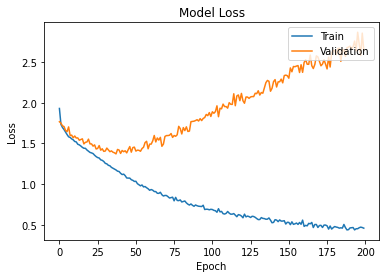

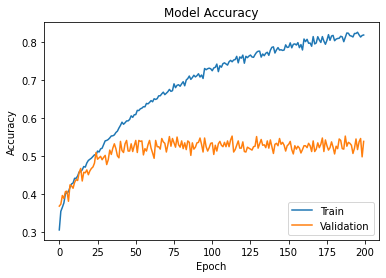

In [23]:
import matplotlib.pyplot as plt

# Plot the convergence graph for loss
plt.plot(history_pca.history['loss'])
plt.plot(history_pca.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the convergence graph for accuracy
plt.plot(history_pca.history['accuracy'])
plt.plot(history_pca.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
pred = model_pca.predict(X_test)
# one hot encoded multiclass labels so converting to argmax
arg_pred = np.argmax(pred, axis=1)
arg_true = np.argmax(y_test, axis=1)
print(confusion_matrix(arg_true, arg_pred))

[[79  2  3  1  2  3  1  3  0  6]
 [ 4 20  2  4  3  1  1  3  0  5]
 [ 3  7 47 14  1  2  4  2  9 11]
 [ 4  1 17 44  3  5  0  3 14  9]
 [ 3  2  2  4 62  2  2 12  3  8]
 [ 3  2  3  2  1 82  0  0  1  6]
 [ 0  0  2  7  1  1 20  1  4  2]
 [ 5  3  2  0  6  5  2 72  1  4]
 [ 1  4  4 13  0  2  1  4 56  8]
 [ 7  9 12  8  6  4  2  9 11 32]]


In [25]:
print(classification_report(arg_true, arg_pred))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76       100
           1       0.40      0.47      0.43        43
           2       0.50      0.47      0.48       100
           3       0.45      0.44      0.45       100
           4       0.73      0.62      0.67       100
           5       0.77      0.82      0.79       100
           6       0.61      0.53      0.56        38
           7       0.66      0.72      0.69       100
           8       0.57      0.60      0.58        93
           9       0.35      0.32      0.34       100

    accuracy                           0.59       874
   macro avg       0.58      0.58      0.58       874
weighted avg       0.59      0.59      0.59       874

